# Exercises: Linear Correlation Analysis

## Lecture Link : 
https://www.quantopian.com/lectures/linear-correlation-analysis

###IMPORTANT NOTE: 
This lecture corresponds to the Linear Correlation Analysis lecture, which is part of the Quantopian lecture series. This homework expects you to rely heavily on the code presented in the corresponding lecture. Please copy and paste regularly from that lecture when starting to work on the problems, as trying to do them from scratch will likely be too difficult.

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

----

## Key Concepts

In [1]:
# Useful Functions
def find_most_correlated(data):
    n = data.shape[1]
    keys = data.keys()
    pair = []
    max_value = 0
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = np.corrcoef(S1, S2)[0,1]
            if result > max_value:
                pair = (keys[i], keys[j])
                max_value = result
    return pair, max_value

In [2]:
# Useful Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---

# Exercise 1: Dependence of Artificial Variables

## a. Finding Variance, Covariance, and Correlation I

By reading the matrix output from the `np.cov()` and `np.corrcoef()` functions, find the variance of the variables $A$ and $B$ and the covariance and correlation of their relationship. 

Covariance:  -0.276015999521453
Correlation:  -0.9984618824663737
perfect negative correlation


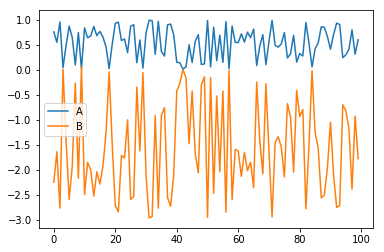

In [5]:
A = np.random.rand(100)
B = -3 * A + np.random.exponential(0.05, 100)
plt.plot(A)
plt.plot(B)
plt.legend(['A','B'])

#Your code goes here
print('Covariance: ', np.cov(A,B)[0,1])
print('Correlation: ', np.corrcoef(A,B)[0,1])
print('perfect negative correlation')

## b. Finding Variance, Covariance, and Correlation II

By reading the matrix output from the `np.cov()` and `np.corrcoef()` functions, find the variance of the variables $C$ and $D$ and the covariance and correlation of their relationship. 

Covariance:  -0.014032644572206838
Correlation:  -0.08954877602142118
no correlation


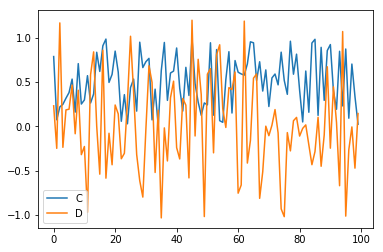

In [7]:
C = np.random.rand(100)
D = np.random.normal(0, 0.5, 100)

#Your code goes here
plt.plot(C)
plt.plot(D)
plt.legend(['C','D'])

print('Covariance: ', np.cov(C,D)[0,1])
print('Correlation: ', np.corrcoef(C,D)[0,1])
print('no correlation')

----

# Exercise 2: Constructing Example Relationships

## a. Positive Correlation Example

Construct a variable $Y$ which has a strong, but not perfect, positive correlation with $X$ $(0.9 < Corr(X,Y) < 1)$, and plot their relationship.

Covariance:  0.18052347946645222
Correlation:  0.9154720830231629


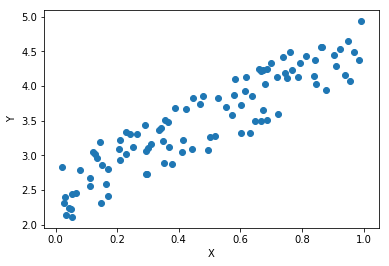

In [10]:
X = np.random.rand(100)
Y = 2*X + 2 + np.random.rand(100)

#Your code goes here
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')

print('Covariance: ', np.cov(X,Y)[0,1])
print('Correlation: ', np.corrcoef(X,Y)[0,1])

## b. Negative Correlation Example

Construct a variable $W$ which has a weak, negative correlation with $Z$ $(-0.3 < Corr(Z,W) < 0)$, and plot their relationship.

Covariance:  -0.19115600905944777
Correlation:  -0.23980358804659507


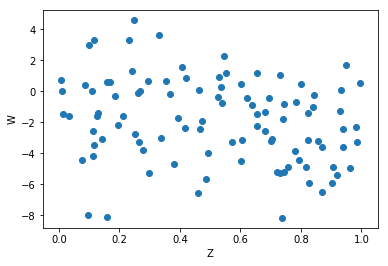

In [18]:
Z = np.random.rand(100)
W = -3*Z + np.random.normal(0, 2.3, 100)

plt.scatter(Z,W)
plt.xlabel('Z')
plt.ylabel('W')

print('Covariance: ', np.cov(Z,W)[0,1])
print('Correlation: ', np.corrcoef(Z,W)[0,1])

----

# Exercise 3: Correlation of Real Assets

## a. Finding Correlation of Real Assets

Find the correlation between the stocks OKE and LAKE. Also check how they correlate with the provided benchmark.

In [21]:
from pandas_datareader import data
start_date='2013-01-01'
end_date='2015-01-01'

OKE = data.DataReader('OKE', 'yahoo', start_date, end_date)['Adj Close']
LAKE = data.DataReader('LAKE', 'yahoo', start_date, end_date)['Adj Close']
benchmark = data.DataReader('SPY', 'yahoo', start_date, end_date)['Adj Close']

#Your code goes here
print('OKE-LAKE correlation: ', np.corrcoef(OKE,LAKE)[0,1])
print('OKE-SPY correlation: ', np.corrcoef(OKE,benchmark)[0,1])
print('LAKE-SPY correlation: ', np.corrcoef(LAKE,benchmark)[0,1])

OKE-LAKE correlation:  0.4457615741624513
OKE-SPY correlation:  0.8522724296847588
LAKE-SPY correlation:  0.625807075003215


## b. Finding Correlated Pairs

Find the most correlated pair of stocks in the following portfolio using 2015 pricing data and the `find_most_correlated` function defined in the Helper Functions section above.

In [29]:
symbol_list = ['GSK', 'AZO','XEC','FB', 'AMZN']
start_date='2015-01-01'
end_date='2016-01-01'

prices = data.DataReader(symbol_list, 'yahoo', start_date, end_date)['Adj Close']

#Your code goes here
print('Most correlated pair of stocks among GSK, SNOW, FB, AZO, XEC, AMZN: ', find_most_correlated(prices))

Most correlated pair of stocks among GSK, SNOW, FB, AZO, XEC, AMZN:  (('AMZN', 'FB'), 0.9575381882468288)


----

# Exercise 4: Limitations of Correlation

## a. Out of Sample Tests

Using pricing data from the first half of 2016, find the correlation coefficient between FB and AMZN and compare it to the strong positive relationship predicted from the 2015 correlation coefficient to see if that result holds.

In [31]:
start_date='2015-01-01'
end_date='2016-01-01'
FB_15 = data.DataReader('FB', 'yahoo', start_date, end_date)['Adj Close']
AMZN_15 = data.DataReader('AMZN', 'yahoo', start_date, end_date)['Adj Close']

start_date='2016-01-01'
end_date='2016-07-01'
FB_16 = data.DataReader('FB', 'yahoo', start_date, end_date)['Adj Close']
AMZN_16 = data.DataReader('AMZN', 'yahoo', start_date, end_date)['Adj Close']

#Your code goes here
print('2015 correlation: ', np.corrcoef(FB_15, AMZN_15)[0,1])
print('2016 correlation: ', np.corrcoef(FB_16, AMZN_16)[0,1])

2015 correlation:  0.9575381882468288
2016 correlation:  0.6510175186611807


## b. Rolling Correlation

Plot the 60-day rolling correlation coefficient between FB and AMZN to make a conclusion about the stability of their relationship.

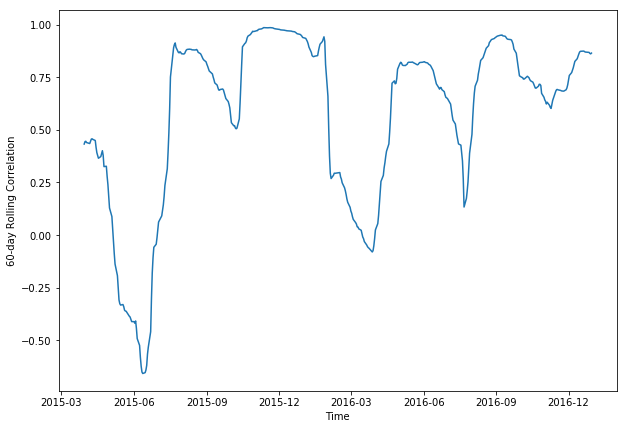

In [132]:
start_date='2015-01-01'
end_date='2017-01-01'
FB = data.DataReader('FB', 'yahoo', start_date, end_date)['Adj Close']
AMZN = data.DataReader('AMZN', 'yahoo', start_date, end_date)['Adj Close']
df = pd.concat([FB,AMZN],axis=1)

rolling_correlation = df.rolling(60).corr(pairwise=True)
rolling_correlation = list(rolling_correlation.iloc[:,1])
rolling_correlation = pd.Series([x for x in rolling_correlation if x<.99])

plt.rcParams["figure.figsize"] = (10,7)
plt.plot(df.index[59:], rolling_correlation)
plt.xlabel('Time')
plt.ylabel('60-day Rolling Correlation');

Congratulations on completing the Linear Correlation Analysis exercises!

As you learn more about writing trading models and the Quantopian platform, enter a daily [Quantopian Contest](https://www.quantopian.com/contest). Your strategy will be evaluated for a cash prize every day.

Start by going through the [Writing a Contest Algorithm](https://www.quantopian.com/tutorials/contest) tutorial.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*